# 2D Advection
Advection equation vector form:

$\frac{\partial\psi}{\partial t} = -\nabla\cdot(\psi\mathbf{u})$

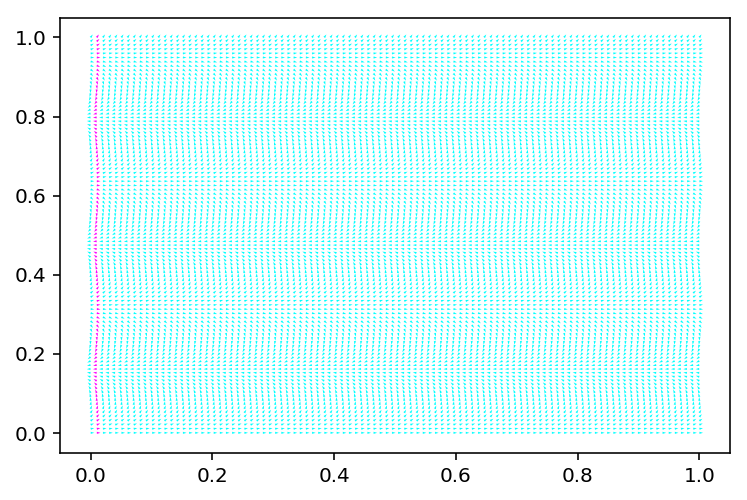

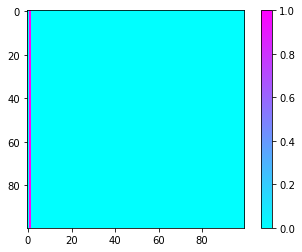

In [2]:
import numpy
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from math import *
%matplotlib inline

xmax = 100
ymax = 100

X,Y = numpy.meshgrid(numpy.linspace(0,1,xmax),
                     numpy.linspace(0,1,ymax))

psi = numpy.zeros((xmax,ymax))
psi[:,1] = 1.0

u = numpy.zeros((xmax,ymax,2))
for x in range(xmax):
    for y in range(ymax):
        u[x,y,0]=cos(x*0.2)*3
        u[x,y,1]=sin(x*0.2)*3

def plot_system():
    fig = plt.figure(dpi=144)
    plt.quiver(X, Y, u[:,:,0], u[:,:,1], psi, antialiased=True)
    plt.set_cmap("cool")
    plt.show()

    im = plt.imshow(psi)
    im.set_cmap("cool")
    cb = plt.colorbar()

plot_system()

For reference, the advection equation after applying the product rule:

$-\frac{\partial\psi}{\partial t} = (\nabla\psi) \cdot \mathbf{u} + \psi(\nabla\cdot\mathbf{u})$

Discritized and Expanded: 

$-\frac{\Delta\psi}{\Delta t} = \mathbf{u}_x\frac{\Delta\psi}{\Delta x} + \mathbf{u}_y\frac{\Delta\psi}{\Delta y} + \psi(\frac{\Delta\mathbf{u}_x}{\Delta x}+\frac{\Delta\mathbf{u}_y}{\Delta y})$

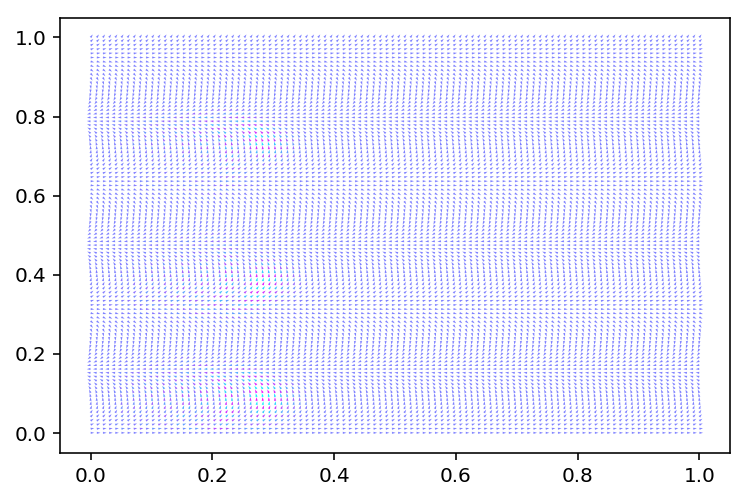

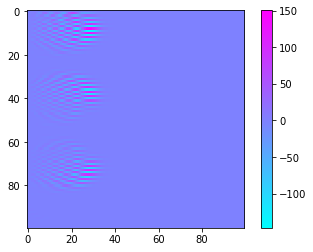

In [4]:
dt = 0.0001
dpsidt = numpy.zeros((xmax, ymax))
for i in range(0,100000):
    #for x in range(0,xmax-1):
    #    for y in range(0,ymax-1):
    #        psi[x,y] -= (u[x,y,0]*((psio[x,y+1]-psio[x,y-1])/2) + u[x,y,1]*((psio[x+1,y]-psio[x-1,y])/2))*dt
    div_u = (u[2:,1:-1,0]-u[:-2,1:-1,0])/2 + (u[1:-1,2:,1]-u[1:-1,:-2,1])/2
    dpsi_dx = (psi[2:,1:-1]-psi[:-2,1:-1])/2
    dpsi_dy = (psi[1:-1,2:]-psi[1:-1,:-2])/2
    dpsidt[1:-1,1:-1] = u[1:-1,1:-1,0]*dpsi_dx + u[1:-1,1:-1,1]*dpsi_dy + psi[1:-1,1:-1]*div_u
    psi -= dpsidt*dt
    
# Plot final solution
plot_system()

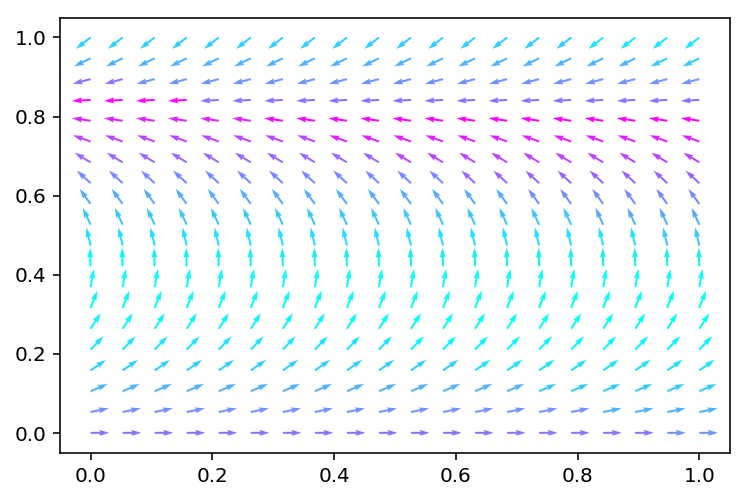

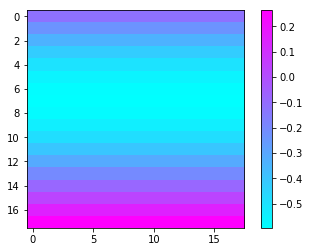

In [279]:
# compute the divergence of u
div_u = (u[2:,1:-1,0]-u[:-2,1:-1,0])/2 + (u[1:-1,2:,1]-u[1:-1,:-2,1])/2

fig = plt.figure(dpi=144)
plt.quiver(X, Y, u[:,:,0], u[:,:,1], div_u, antialiased=True)
plt.set_cmap("cool")
plt.show()
imd = plt.imshow(div_u)
imd.set_cmap("cool")
cb = plt.colorbar()